In [21]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from ipywidgets import interact,interactive
import ipywidgets as widgets

from IPython.display import HTML

global global_K1
global global_K2
global global_branche

In [30]:
def get_closest_point(clic_x,clic_y):
    # Get the data from the figure
    ax= plt.gca() # get axis handle
    acoustic_data = ax.lines[1]
    optic_data = ax.lines[0]

    # Find which line was closer
    #closet x data
    k_a = acoustic_data.get_xdata()
    k_o = optic_data.get_xdata()
    diff_k_a = np.abs(k_a-clic_x)
    diff_k_o = np.abs(k_o-clic_x)
    # get the x index corresponding to the closet k in the graph for both branches
    index_a = np.argmin(diff_k_a)
    index_o = np.argmin(diff_k_o)

    # compute the distance on the y axis
    y_diff_a = np.abs(acoustic_data.get_ydata()[index_a]-clic_y)
    y_diff_o = np.abs(optic_data.get_ydata()[index_o]-clic_y)

    ac_is_closer = y_diff_a<y_diff_o
    # print a x at the postion 
    global global_branche
    global global_selected_k
    global global_omega
    if(ac_is_closer):
        global_branche=1
        global_selected_k = acoustic_data.get_xdata()[index_a]
        global_omega = acoustic_data.get_ydata()[index_a]
        return [acoustic_data.get_xdata()[index_a], acoustic_data.get_ydata()[index_a]]
    else:
        global_branche=2
        global_selected_k = optic_data.get_xdata()[index_a]
        global_omega = optic_data.get_ydata()[index_a]

        return [optic_data.get_xdata()[index_a], optic_data.get_ydata()[index_a]]


    
    
def interactive_lattice_plot(G,K):
    '''
    :param G,K: coupling
    plot acoustic and optical phonons bands
    '''
    
    # save the current values of G and K    
    global global_K1
    global global_K2
    global_K1=G
    global_K2=K
    
    plt.close()
    fig=plt.figure()

    k = np.linspace(-np.pi/2,np.pi/2,100)

    omega_o = G+K-np.sqrt((G+K)**2-4*G*K*np.sin(k)**2)
    omega_a = G+K+np.sqrt((G+K)**2-4*G*K*np.sin(k)**2)
    
    ax1=plt.gca()
    ax1.plot(k,np.sqrt(omega_a))
    ax1.plot(k,np.sqrt(omega_o))
    ax1.set_xlabel("k")
    ax1.set_ylabel("omega")
    
   
    def onclick(event):    
        ax1=plt.gca()
        # clear the previous point 
        for i in np.arange(3, len(ax1.lines)+1) :
            ax1.lines.pop()
        # Get the coordonate of the data closest from the click
        [x,y]=get_closest_point(event.xdata,event.ydata)
        ax1.plot(x, y, '.',color='red')
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()



In [31]:
interactive_plot = interactive(interactive_lattice_plot, G=(1, 6.0), K=(1, 6.0))
interactive_plot


interactive(children=(FloatSlider(value=3.5, description='G', max=6.0, min=1.0), FloatSlider(value=3.5, description='K', max=6.0, min=1.0), Output()), _dom_classes=('widget-interact',))

<IPython.core.display.Javascript object>


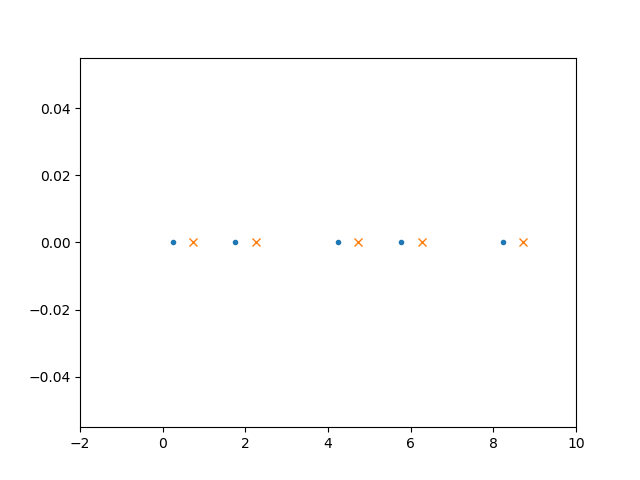

In [32]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlim([-2,10])
line_u, = ax.plot([], [], ".")
line_v, = ax.plot([], [], "x")

# Initialization function: plot the background of each frame
def init():
    line_u.set_data([], [])
    line_v.set_data([], [])

    return line_u,

# Animation function which updates figure data.  This is called sequentially
def animate(iteration):
    t=0.05*iteration
    a = 2 # lattice parameter
    d = 0.5 # distance between atoms 1 and 2 in basis 
    N=5 # number of repeated basis 
    global global_branche # acoustic or optical selected in the previous graph
    global global_selected_k # wave number selected in the previous graph
    relative_phase = (-1)** (1+global_branche) # relative phase between atom 1 and 2 in the basis

    global global_K1
    global global_K2 # interactions 
    
    a_nu = d/2*(relative_phase*(global_K1+global_K2*np.exp(1j*global_selected_k*a))/np.abs(global_K1+global_K2*np.exp(1j*global_selected_k*a)))
    b_nu = d/2 
    
    ns = np.arange(N)
    u_n = np.real(a_nu*np.exp(1j*global_selected_k*ns*a-1j*global_omega*t))
    v_n = np.real(b_nu*np.exp(1j*global_selected_k*ns*a-1j*global_omega*t))
    
    pos_u = np.arange(N)*a + u_n
    pos_v = np.arange(N)*a+d+v_n
    
    line_u.set_data(np.asarray([pos_u,np.zeros(N)]))
    line_v.set_data(np.asarray([pos_v,np.zeros(N)]))
    return line_u,

# Call the animator.  blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=30, blit=True)
HTML(anim.to_html5_video())